In [ ]:
!pip install wordcloud

In [ ]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('/content/Noun_Verb_data.xlsx', engine='openpyxl')
data

,내용,라벨
0,가다 사용자 적격 인정 연맹 노동조합 대표 주소지 통합 예정 사업 연맹 노동조합 독...,0
1,가다 징계 해고 사유 존재 근로자 무직 서울시 무직 채용 복무 조례 적용 받다 징역...,0
2,근로자 구인 공고 보고 입사 지원 하다 구인 공고 단기 당직 제목 구인 공고 하다 ...,0
3,근로자 관리소 지시 거부 하다 근로자 필요 다른 사람 하다 만두라 하다 해고 하다 ...,0
4,가다 근로 계약 법적 성격 기간 정함 최초 근로계약서 체결 직후 사용자 근로자 행실...,0
...,...,...
12631,근로자 채용 하다 학력 경력 기재 이력서 제출 요구 하다 근로자 능력 평가 하다 하...,0
12632,신청 사업 부장 근무 하다 기간 부하 직원 횡령 사고 관리 감독 해태 부하 직원 금...,1
12633,되다 경우 비록 대다 보험 가입 근로 제공 하다 않다 당사자 다툼 늘다 당시 다른 ...,2
12634,신청 행위 징계 대상 되다 하다 폭행 당사자 징계 위원 참석 정성 결여 되다 정면 ...,1


In [8]:
data_label0 = data[data['라벨']==0]
data_label1 = data[data['라벨']==1]
data_label2 = data[data['라벨']==2]

In [ ]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

# 명사 리스트 생성
nouns = []
for i in data_label2['내용']:
  noun = mecab.nouns(i)
  nouns.extend(noun)


count = Counter(nouns)

display(count)

In [22]:
#폰트설치

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# 참고 사이트 : https://blog.naver.com/PostView.nhn?blogId=dsz08082&logNo=222021179448&redirect=Dlog&widgetTypeCall=true&directAccess=false

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 156433 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [23]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(count))
wc.to_file("label_2.png")

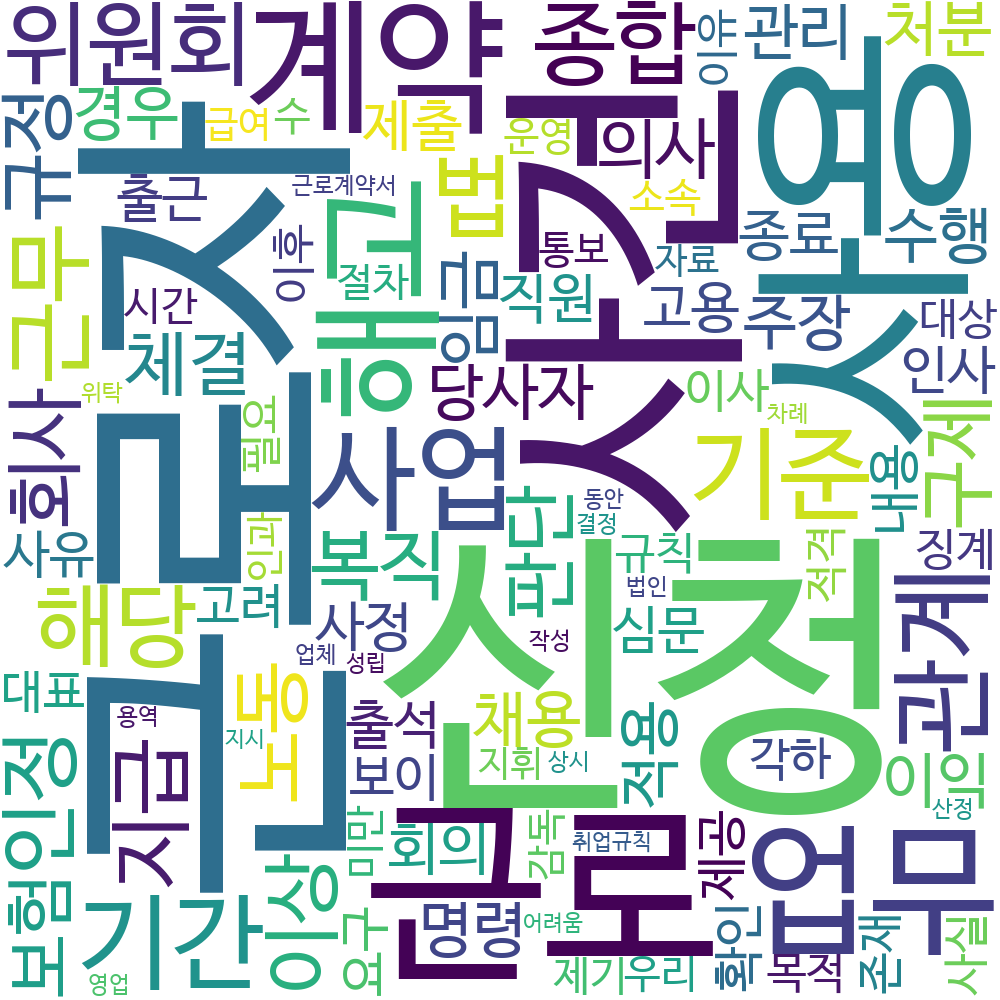

In [25]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('label_2.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)